<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
train_data = pd.read_csv("/datasets/gold_industry_train.csv")
test_data = pd.read_csv("/datasets/gold_industry_test.csv")
full_data = pd.read_csv("/datasets/gold_industry_full.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [6]:
full_data.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [7]:
test_data.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [8]:
train_data.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [9]:
train_data = train_data.fillna(method='ffill')

In [10]:
full_data = full_data.fillna(method='ffill')

In [11]:
test_data = test_data.fillna(method='ffill')

Пропуски в данных заполнили предыдушим наблюдением 

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [12]:
#доля золота в сырье/концентрате до флотации/очистки
C = train_data['rougher.output.concentrate_au']

# доля золота в концентрате после флотации/очистки
F = train_data['rougher.input.feed_au']

#доля золота в отвальных хвостах после флотации/очистки
T = train_data['rougher.output.tail_au']

ttt = train_data['rougher.output.recovery']

In [13]:
recovery = ((C * (F - T)) / (F * (C - T))) * 100

In [14]:
print("Средняя абсолютная ошибка = ", MAE(ttt, recovery))

Средняя абсолютная ошибка =  9.83758577644259e-15


Различия между расчитанными и истинными значиениями равно 9.8. 

Различия в пределах нормы - эффективность обогащения рассчитана правильно.

1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
def difference(test, train):
    
    train = train.columns
    test = test.columns       
    diff = train.difference(test)
    col = 0
        
    print()
    print('Признаки недоступные в тестовой выборке:')
    print()
    print('Количество признаков в тренировочной выборке = ', len(train))
    print('Количество признаков в тестовой выборке = ', len(test))
    print()
        
    for i in diff:            
        col += 1
        print(col, i)
            
difference(test_data, train_data)            


Признаки недоступные в тестовой выборке:

Количество признаков в тренировочной выборке =  87
Количество признаков в тестовой выборке =  53

1 final.output.concentrate_ag
2 final.output.concentrate_au
3 final.output.concentrate_pb
4 final.output.concentrate_sol
5 final.output.recovery
6 final.output.tail_ag
7 final.output.tail_au
8 final.output.tail_pb
9 final.output.tail_sol
10 primary_cleaner.output.concentrate_ag
11 primary_cleaner.output.concentrate_au
12 primary_cleaner.output.concentrate_pb
13 primary_cleaner.output.concentrate_sol
14 primary_cleaner.output.tail_ag
15 primary_cleaner.output.tail_au
16 primary_cleaner.output.tail_pb
17 primary_cleaner.output.tail_sol
18 rougher.calculation.au_pb_ratio
19 rougher.calculation.floatbank10_sulfate_to_au_feed
20 rougher.calculation.floatbank11_sulfate_to_au_feed
21 rougher.calculation.sulfate_to_au_concentrate
22 rougher.output.concentrate_ag
23 rougher.output.concentrate_au
24 rougher.output.concentrate_pb
25 rougher.output.concentrat

В тестовой выборке недоступно 34 признака: 
    
    - final.output. - финальные характеристики параметров продукта
    - primary_cleaner.output. - первичная очистка параметров продукта
    - rougher.calculation. - расчётные характеристики флотации
    - rougher.output. - флотационные параметры продукта
    - secondary_cleaner.output. - параметры продукта вторичной очистки и пр.

Данные относятся:
- к параметрам расчётной характеристики
- к типу парметра продукта, 
- к этапу технологического процесса,


**1.4.** Проведите предобработку данных.

Проверка на наличие дублей

In [16]:
test_data.duplicated().sum()

0

In [17]:
train_data.duplicated().sum()

0

In [18]:
full_data.duplicated().sum()

0

Так как модель будет работать в режиме онлайн на новых данных, где не будет возможности измерять те признаки, которых нет в тестовом датасете, избавимся от лишних признаков в обучающей выборке.

In [19]:
train_data = train_data[test_data.columns]

In [20]:
print("Количество признаков в обучающей выборке = ", len(train_data.columns))
print("Количество признаков в тестовой выборке = ", len(test_data.columns))

Количество признаков в обучающей выборке =  53
Количество признаков в тестовой выборке =  53


**Вывод к ШАГУ 1:**

В расопоряжении три набора данных:
- тестовая
- обчающая 
- общий набор данных

Два целевых признака:
- эффективность обогащения чернового концентрата: rougher.output.recovery
- эффективность обогащения финального концентрата: final.output.recovery

В процессе предобработки выполнены следоующие шаги:
- Исследовано среднее абсолютное отклонение(MAE) между расчетами эффективности обогащения и признаком rougher.output.recovery
- Обработы пропуски
- Удалены лишние признаки 
- Данные проверены на наличие явных дублей

## Анализ данных

**2.1.** Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.

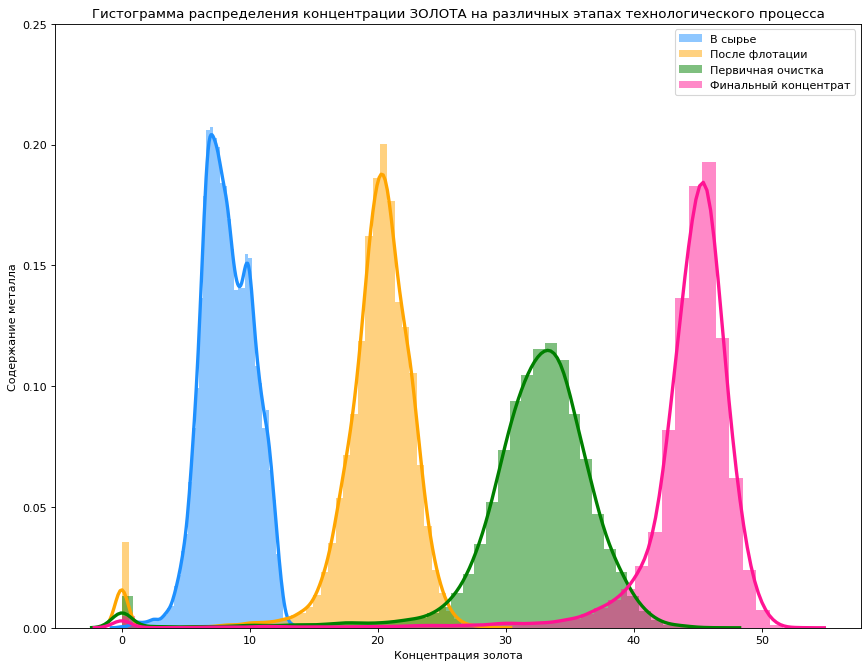

In [21]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(full_data["rougher.input.feed_au"], color="dodgerblue", label="В сырье", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['rougher.output.concentrate_au'], color="orange", label="После флотации", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['primary_cleaner.output.concentrate_au'], color="g", label="Первичная очистка", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['final.output.concentrate_au'], color="deeppink", label="Финальный концентрат", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})

plt.ylim(0, 0.25)

plt.xlabel("Концентрация золота")
plt.ylabel("Содержание металла")
plt.title("Гистограмма распределения концентрации ЗОЛОТА на различных этапах технологического процесса", fontsize=12)

plt.legend()
plt.show()

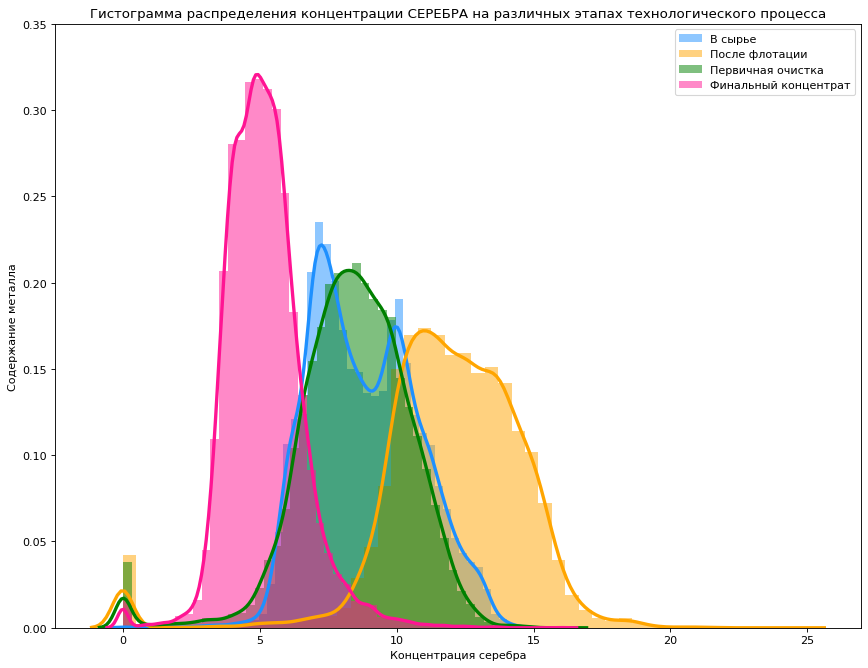

In [22]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(full_data["rougher.input.feed_ag"], color="dodgerblue", label="В сырье", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['rougher.output.concentrate_ag'], color="orange", label="После флотации", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['primary_cleaner.output.concentrate_ag'], color="g", label="Первичная очистка", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['final.output.concentrate_ag'], color="deeppink", label="Финальный концентрат", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})

plt.ylim(0, 0.35)

plt.xlabel("Концентрация серебра")
plt.ylabel("Содержание металла")
plt.title("Гистограмма распределения концентрации СЕРЕБРА на различных этапах технологического процесса", fontsize=12)

plt.legend()
plt.show()

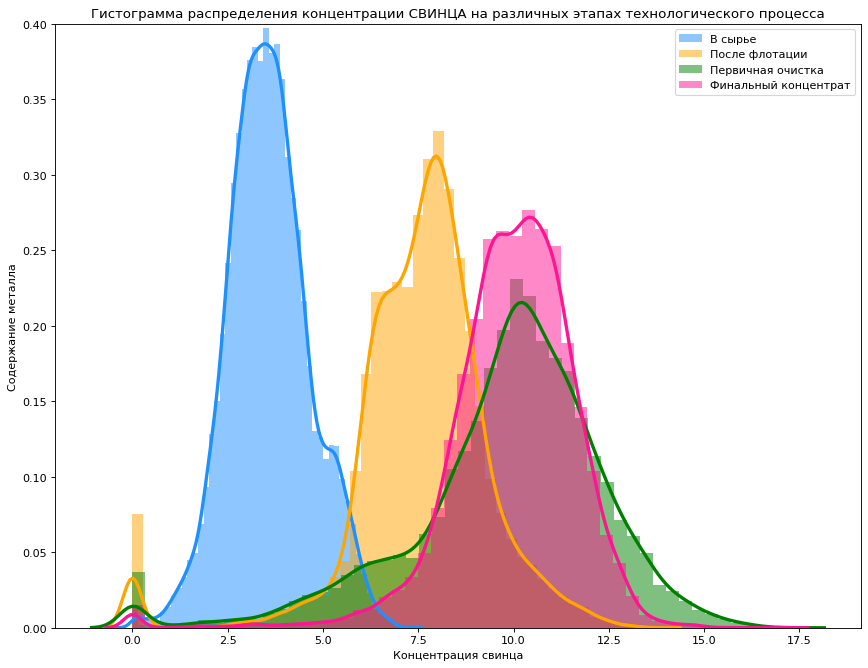

In [23]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(full_data["rougher.input.feed_pb"], color="dodgerblue", label="В сырье", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['rougher.output.concentrate_pb'], color="orange", label="После флотации", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['primary_cleaner.output.concentrate_pb'], color="g", label="Первичная очистка", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(full_data['final.output.concentrate_pb'], color="deeppink", label="Финальный концентрат", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})

plt.ylim(0, 0.40)

plt.xlabel("Концентрация свинца")
plt.ylabel("Содержание металла")
plt.title("Гистограмма распределения концентрации СВИНЦА на различных этапах технологического процесса", fontsize=12)

plt.legend()
plt.show()

Изменение концентрации металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате:
- Au. Концентрация золота возрастает на каждом этапе.
- Ag. Концентрация серебра начинает постепенно возратать начиная с первичной очистки, финальный концентрат достиг отметку ~0.33
- Pb. Концентрация свинца снижается на первых трёх этапах и в финальном концентрате начинает повышаться

2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

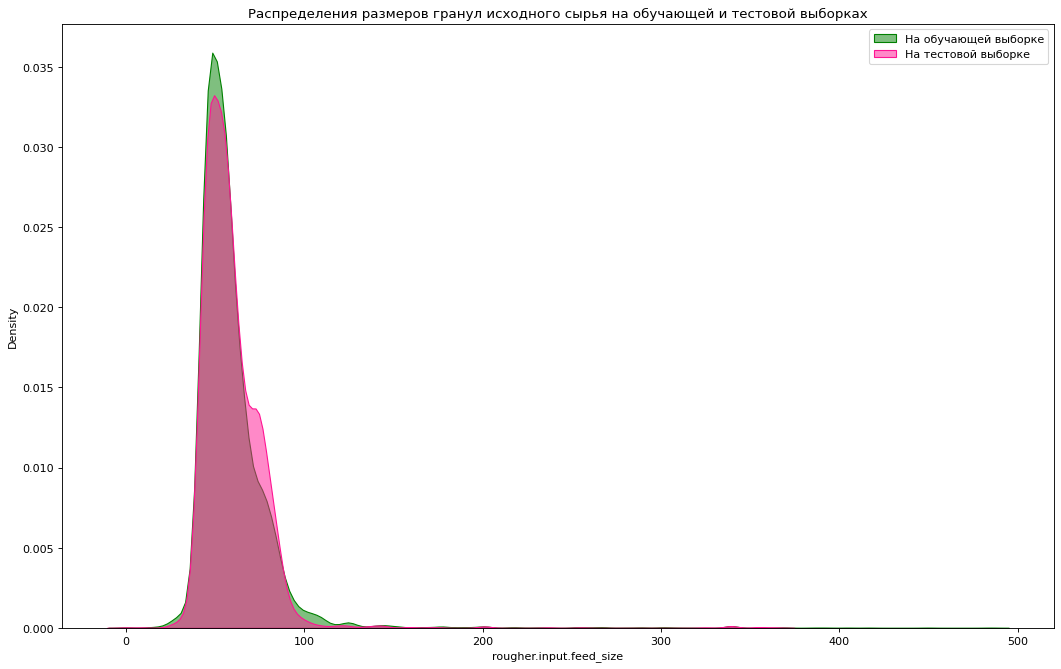

In [24]:
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(train_data['rougher.input.feed_size'], shade=True, color="g", label="На обучающей выборке", alpha=.5)
sns.kdeplot(test_data['rougher.input.feed_size'], shade=True, color="deeppink", label="На тестовой выборке", alpha=.5)

plt.title('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках', fontsize=12)
plt.legend()
plt.show()

Количество наблюдений исходного сырья на обучающей и тестовой выборках разнятся. В обучающей выборке больше данных чем в тестовой.

Распределения гранул двух выборок находятся в одном диапазоне.

**2.3.** Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [25]:
#в сырье
rougher_feed = (full_data["rougher.input.feed_pb"] + full_data["rougher.input.feed_au"] + full_data["rougher.input.feed_ag"] + full_data["rougher.input.feed_sol"])
#В черновом концентрате 
rougher_concentrate = (full_data['rougher.output.concentrate_pb'] + full_data['rougher.output.concentrate_au'] + 
                       full_data['rougher.output.concentrate_ag'] + full_data['rougher.output.concentrate_sol'])
#в концентрате после первой очистки
cleaner_concentrate = (full_data['primary_cleaner.output.concentrate_pb'] + full_data['primary_cleaner.output.concentrate_au'] + 
                       full_data['primary_cleaner.output.concentrate_ag'] + full_data['primary_cleaner.output.concentrate_sol'])

#в финальном концентрате
final_concentrate = (full_data['final.output.concentrate_pb'] + full_data['final.output.concentrate_au'] + 
                     full_data['final.output.concentrate_ag'] + full_data['final.output.concentrate_sol'])

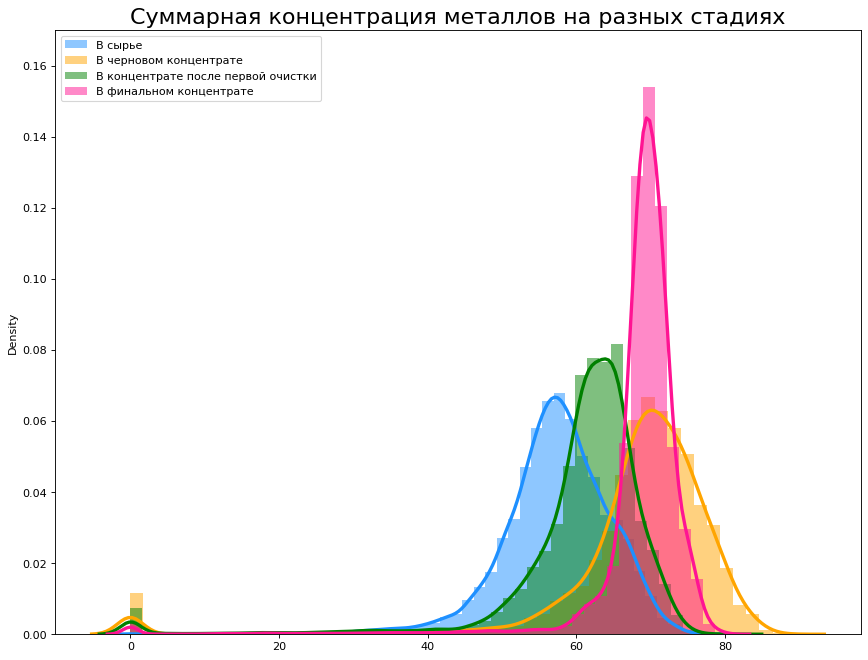

In [26]:
plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(rougher_feed, color="dodgerblue", label="В сырье", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(rougher_concentrate, color="orange", label="В черновом концентрате", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(cleaner_concentrate, color="g", label="В концентрате после первой очистки", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(final_concentrate, color="deeppink", label="В финальном концентрате", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})

plt.ylim(0, 0.17)

# Decoration
plt.title('Суммарная концентрация металлов на разных стадиях', fontsize=20)
plt.legend()
plt.show()

На графике видны аномальные значения, обработаем и построим график заново

In [27]:
rougher_feed = rougher_feed[rougher_feed > 1]
rougher_concentrate = rougher_concentrate[rougher_concentrate > 1]
cleaner_concentrate = cleaner_concentrate[cleaner_concentrate > 1]
final_concentrate = final_concentrate[final_concentrate > 1]

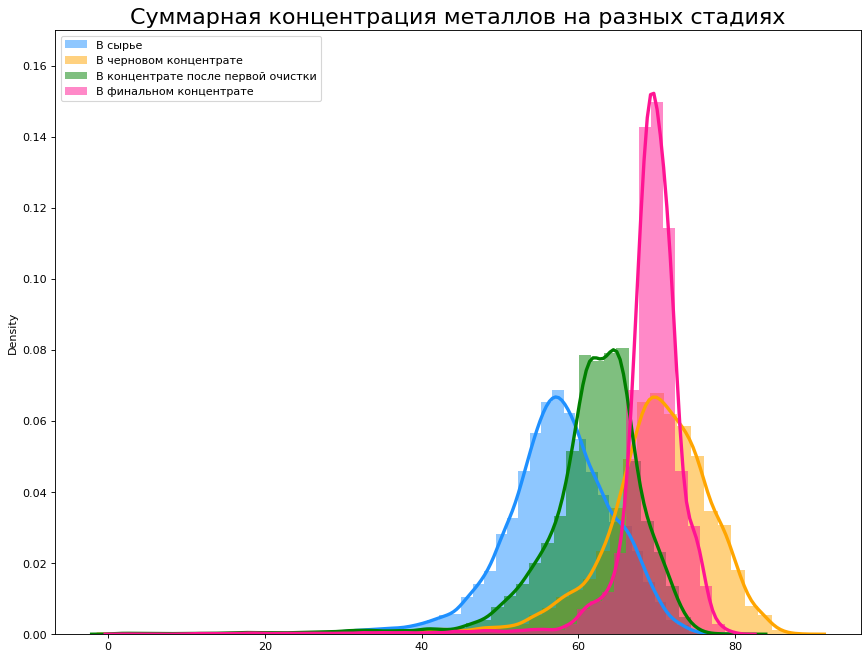

In [28]:
plt.figure(figsize=(13,10), dpi= 80)

sns.distplot(rougher_feed, color="dodgerblue", label="В сырье", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(rougher_concentrate, color="orange", label="В черновом концентрате", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(cleaner_concentrate, color="g", label="В концентрате после первой очистки", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(final_concentrate, color="deeppink", label="В финальном концентрате", hist_kws={'alpha':.5}, kde_kws={'linewidth':3})

plt.ylim(0, 0.17)

# Decoration
plt.title('Суммарная концентрация металлов на разных стадиях', fontsize=20)
plt.legend()
plt.show()

Суммарная концентрация металлов в финальном концентрате больше, чем на предыдущих стадиях 

**Вывод к ШАГУ 2:**
- Исследовано изменение концентрации металлов (Au, Ag, Pb) на различных этапах
- Исследовано распределение размеров гранул исходного сырья на обучающей и тестовой выборках
- Исследовано суммарная концентрация металлов на разных стадиях

Так же в процессе исследования были найдены и обработаны аномальные значения

## Модель

**3.1.** Напишите функцию для вычисления итоговой sMAPE.

In [29]:
def sMAPE_final(rougher, final):
    
    return (.25 * rougher) + (.75 * final)
    

In [30]:
def sMAPE(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean()
    return result * 100

In [31]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [32]:
train_data = train_data.drop(['date'], axis=1)
test_data = test_data.drop(['date'], axis=1)

In [33]:
features_train_rougher = train_data
features_test_rougher = test_data

features_train_final = train_data
features_test_final = test_data

target_train_rougher = full_data.loc[features_train_rougher.index, 'rougher.output.recovery']
target_test_rougher = full_data.loc[features_test_rougher.index, 'rougher.output.recovery']

target_train_final = full_data.loc[features_train_final.index, 'final.output.recovery']
target_test_final = full_data.loc[features_test_final.index, 'final.output.recovery']

print(f'Features Rougher на трейне = {features_train_rougher.shape}')
print(f'Target Rougher на трейне = {target_train_rougher.shape}') 
print()
print(f'Features Rougher на тестовой = {features_test_rougher.shape}')
print(f'Target Rougher на тесте = {target_test_rougher.shape}')

print()
print(f'Features Final на трейне = {features_train_final.shape}')
print(f'Target Final на трейне = {target_train_final.shape}') 
print()
print(f'Features Final на тестовой = {features_test_final.shape}')
print(f'Target Final на тесте = {target_test_final.shape}')

Features Rougher на трейне = (14579, 52)
Target Rougher на трейне = (14579,)

Features Rougher на тестовой = (4860, 52)
Target Rougher на тесте = (4860,)

Features Final на трейне = (14579, 52)
Target Final на трейне = (14579,)

Features Final на тестовой = (4860, 52)
Target Final на тесте = (4860,)


In [34]:
%%time
model_lr = LinearRegression()

model_rougher_lr = model_lr.fit(features_train_rougher, target_train_rougher)
model_final_lr = model_lr.fit(features_train_final, target_train_final)

scores_rougher = cross_val_score(model_lr,
                          features_train_rougher,
                          target_train_rougher,
                          scoring=smape_scorer,
                          cv=5)

scores_final = cross_val_score(model_lr,
                        features_train_final,
                        target_train_final,
                        scoring=smape_scorer,
                        cv=5)

final_scores_rougher_lr = pd.Series(scores_rougher).mean() 
final_scores_final_lr = pd.Series(scores_final).mean()

CPU times: user 1.09 s, sys: 1.8 s, total: 2.89 s
Wall time: 2.88 s


In [35]:
print(f'sMAPE финального концентрата = {final_scores_rougher_lr}')
print(f'sMAPE на чернового концентрата = {final_scores_final_lr}')
print(f'Итоговое sMAPE = {sMAPE_final(final_scores_rougher_lr, final_scores_final_lr)}')

sMAPE финального концентрата = -13.781732828237228
sMAPE на чернового концентрата = -11.169089731566947
Итоговое sMAPE = -11.822250505734516


In [36]:
%%time

model_rfr = RandomForestRegressor(random_state=12345, n_estimators=12, max_depth=60, min_samples_leaf=4)
            
scores_rougher = cross_val_score(model_rfr,
                                features_train_rougher,
                                 target_train_rougher,
                                 scoring=smape_scorer,
                                 cv=5)
            
scores_final = cross_val_score(model_rfr,
                               features_train_final,
                               target_train_final,
                               scoring=smape_scorer,
                               cv=5)
            
            
final_scores_rougher_rfr = pd.Series(scores_rougher).mean()
final_scores_final_rfr = pd.Series(scores_final).mean()
            

CPU times: user 1min 1s, sys: 169 ms, total: 1min 1s
Wall time: 1min 1s


In [37]:
print(f'sMAPE финального концентрата = {final_scores_rougher_rfr}')
print(f'sMAPE на чернового концентрата = {final_scores_final_rfr}')
print(f'Итоговое sMAPE = {sMAPE_final(final_scores_rougher_rfr, final_scores_final_rfr)}')

sMAPE финального концентрата = -15.414051587116045
sMAPE на чернового концентрата = -11.977327655907157
Итоговое sMAPE = -12.836508638709379


In [38]:
rf1 = DecisionTreeRegressor()
parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8)}

In [39]:
grid = GridSearchCV(rf1, parametrs, cv=5)

In [40]:
model_grid_rougher = grid.fit(features_train_rougher, target_train_rougher)
model_grid_final = grid.fit(features_train_final, target_train_final)

In [41]:
print('rougher=', model_grid_rougher.best_params_)
print('final=', model_grid_final.best_params_)

rougher= {'max_depth': 3, 'min_samples_leaf': 7}
final= {'max_depth': 3, 'min_samples_leaf': 7}


In [42]:
%%time

scores_rougher = cross_val_score(model_grid_rougher,
                          features_train_rougher,
                          target_train_rougher,
                          scoring=smape_scorer,
                          cv=5)

scores_final = cross_val_score(model_grid_final,
                        features_train_final,
                        target_train_final,
                        scoring=smape_scorer,
                        cv=5)

final_scores_rougher_dtr = pd.Series(scores_rougher).mean() 
final_scores_final_dtr = pd.Series(scores_final).mean()

CPU times: user 9min 33s, sys: 307 ms, total: 9min 34s
Wall time: 9min 34s


In [43]:
print(f'sMAPE финального концентрата = {final_scores_rougher_dtr}')
print(f'sMAPE на чернового концентрата = {final_scores_final_dtr}')
print(f'Итоговое sMAPE = {sMAPE_final(final_scores_rougher_dtr, final_scores_final_dtr)}')

sMAPE финального концентрата = -14.50885028234874
sMAPE на чернового концентрата = -11.12728820340655
Итоговое sMAPE = -11.972678723142097


**ТЕСТИРОВАНИЕ МОДЕЛИ**

In [44]:
%%time

model = LinearRegression()

model_rougher = model.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_rougher.predict(features_test_rougher)


model_final = model.fit(features_train_final, target_train_final)
predicted_final = model_rougher.predict(features_test_final)

rougher = sMAPE(target_test_rougher, predicted_rougher)
final = sMAPE(target_test_final, predicted_final)

final_smape_test = sMAPE_final(rougher, final)

print(f'Итоговое sMAPE = {final_smape_test}')

Итоговое sMAPE = 13.97809578804573
CPU times: user 410 ms, sys: 990 ms, total: 1.4 s
Wall time: 1.39 s


Симметричное среднее абсолютное процентное отклонение на тестовой модели больше предыдущих результатов, далее необходимо проверить модель на адекватность.

In [45]:
dummy_regr = DummyRegressor(strategy="median")

In [46]:
dummy_rougher = dummy_regr.fit(features_train_rougher, target_train_rougher)
dummy_final = dummy_regr.fit(features_train_final, target_train_final)

In [47]:
dummy_pred_rougher = dummy_regr.predict(features_test_rougher)
dummy_pred_final = dummy_regr.predict(features_test_final)

In [48]:
rougher_sMAPE = sMAPE(target_test_rougher, dummy_pred_rougher)
final_sMAPE = sMAPE(target_test_final, dummy_pred_final)

In [49]:
final_sMAPE = sMAPE_final(rougher_sMAPE, final_sMAPE)

In [50]:
final_sMAPE

13.679839716793428

Значение финальной модели = 13.97809578804573

Значение фиктивной модели = 13.679839716793428

Хоть и не сильно, но значение финальной модели больше фиктивной.

**Вывод к ШАГУ 3:**

- Реализаваны функции для вычисления sMAPE
- Обучены три модели и исследовано их качество кросс-валидацией
- Для тестовой выборки обучили модель LinearRegression()
- Проверили модель на адекватность

**ИТОГОВЫЙ ВЫВОД:**

В распоряжении были данные организации ЦИФРЫ, что разрабатывает решения для эффективной работы промышленных предприятий.

Задача проекта - прогноз величин:
- эффективность обогащения чернового концентрата
- эффективность обогащения финального концентрата

В процессе работы выполнены следубщие шаги:
- Данные исследованы и обработаны для последующих манипуляций
- Исследовательский анализ данных:
     - Исследовано изменение концентрации металло:
          - Концентрация золота после первичной очистки уменьшается, и возрастает в финальном концентрате.
          - Концентрация серебра начинает постепенно возратать начиная с первичной очистки, финальный концентрат достиг отметку ~0.33.
          - Концентрация свинца снижается на первых трёх этапах и в финальном концентрате начинает повышаться.
     - Исследовано распределение размеров гранул:
          - Они находятся в одном диапазоне.
     - Исследовано суммарная концентрация металлов:
          - В финальном концентрате суммарная концентрация металлов повышается.
- Обучены разные модели и исследовано их качество кросс-валидацией
- С помощью фиктивного классификатора DummyRegressor, проверили модель на адекватность. Значение фиктивного классификатора меньше значения финальной модели

Для тестирования была выбрана модель LinearRegression()

Симметричное среднее абсолютное процентное отклонение на тестовой модели = 13.97809578804573
